# Hente CSV fra SSBs API til Pandas
## Konjunkturtendensene (KT) prognoser 


In [1]:
# Importerer Python pandas for å kunne lage dataframe
import pandas as pd
import matplotlib.pyplot as plt

pd.read_csv() henter innholdet fra API-et og legger det i `df`. 
De norske datasettene her er semikolonseparert og med komma som desimaltegn.
CSV i dette API-et er ikke UTF-8, så vi må angi parameter `encoding` for å få ÆØÅ riktig. 

In [2]:
df = pd.read_csv("https://data.ssb.no/api/pxwebapi/v2/tables/12880/data?lang=no\
&valueCodes[ContentsCode]=KonsumHushold,BNP,BNPFastland,Sysselsatte,ArbLedighet,Aarslonn,KPI,KPIJAE,Boligpris,PengemRente,ImpVKroneKurs\
&valueCodes[Tid]=top(15)\
&outputFormat=csv&stub=Tid,ContentsCode\
&outputformatparams=usetexts", encoding = "ISO-8859-1" )

Sjekker at datatypen Pandas dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   år                                                              165 non-null    int64  
 1   statistikkvariabel                                              165 non-null    object 
 2   12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser,  165 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 4.0+ KB


Viser 12 første linjer av datasettet

In [4]:
df.head(12)

,år,statistikkvariabel,"12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser,"
0,2014,Konsum i husholdninger mv,2.1
1,2014,Bruttonasjonalprodukt (BNP),2.0
2,2014,BNP Fastlands-Norge,2.2
3,2014,Sysselsatte personer,1.0
4,2014,Arbeidsledighetsrate (nivå),3.6
5,2014,Årslønn,3.1
6,2014,Konsumprisindeksen (KPI),2.0
7,2014,KPI-JAE,2.4
8,2014,Boligpris,2.7
9,2014,Pengemarkedsrente (nivå),1.7


Evt. enkel endring til datoformat. Ikke strengt nødvendig.   

In [5]:
df['år'] = pd.to_datetime(df['år'], format='%Y', errors='coerce').dt.year

In [6]:
df

,år,statistikkvariabel,"12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser,"
0,2014,Konsum i husholdninger mv,2.1
1,2014,Bruttonasjonalprodukt (BNP),2.0
2,2014,BNP Fastlands-Norge,2.2
3,2014,Sysselsatte personer,1.0
4,2014,Arbeidsledighetsrate (nivå),3.6
...,...,...,...
160,2028,Konsumprisindeksen (KPI),2.4
161,2028,KPI-JAE,2.5
162,2028,Boligpris,4.0
163,2028,Pengemarkedsrente (nivå),3.8


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column                                                          Non-Null Count  Dtype  
---  ------                                                          --------------  -----  
 0   år                                                              165 non-null    int32  
 1   statistikkvariabel                                              165 non-null    object 
 2   12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser,  165 non-null    float64
dtypes: float64(1), int32(1), object(1)
memory usage: 3.4+ KB


Lager linjediagrammer med Pandas plot. Vi angir x og y aksen og grupperer med .groupby. 
Vi ønsker ikke å få alfabetisk sortering.

### Alternativt- iterere

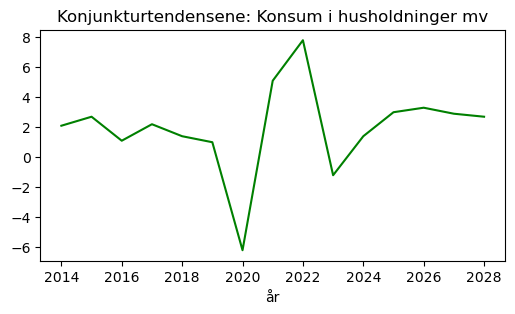

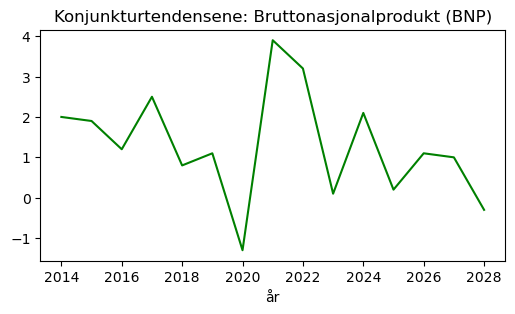

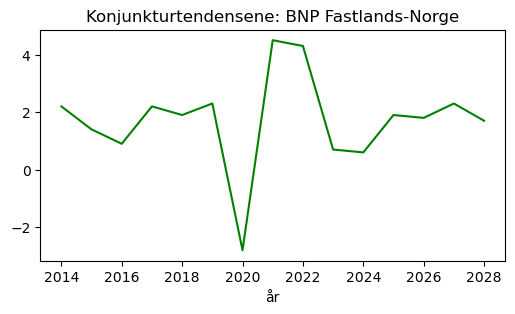

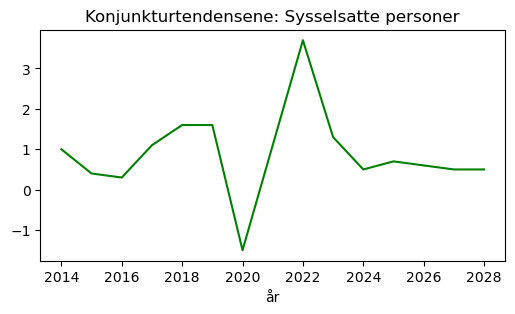

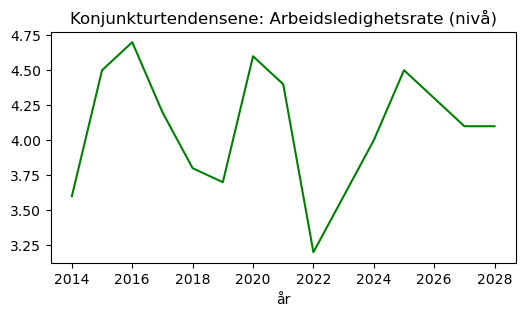

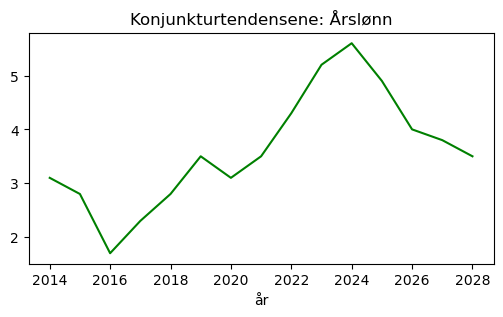

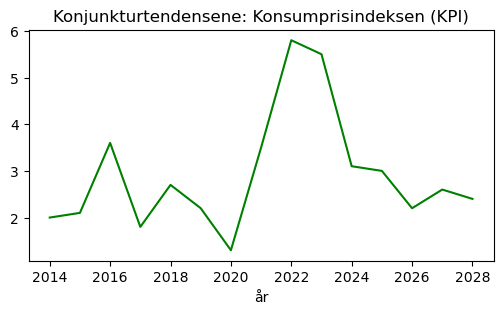

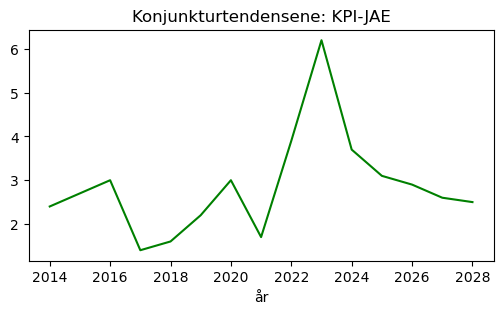

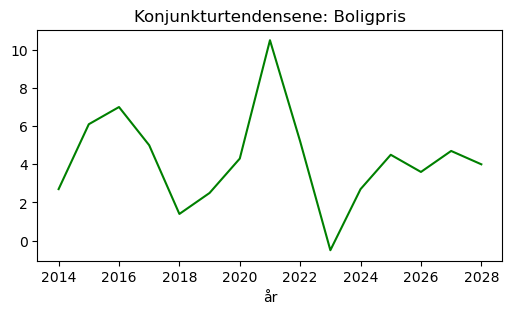

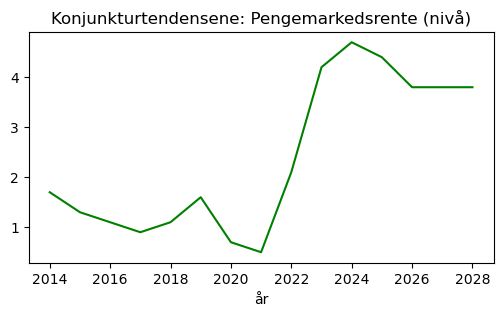

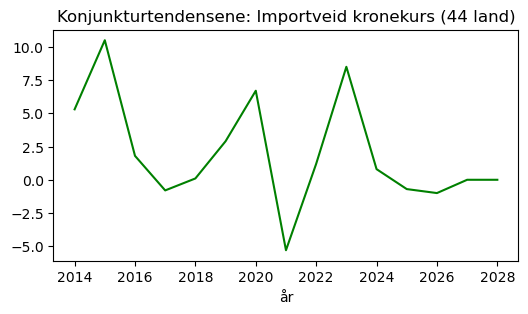

In [8]:
for group_name, group_data in df.groupby('statistikkvariabel', sort=False):
    group_data.plot(x='år', figsize=(6, 3), color ='g')
    plt.title("Konjunkturtendensene: " + group_name)
    plt.legend('', frameon=False)
    plt.show()

For å få alle linjene i en figur i Pandas plot er det best å pivotere tabellen. Oppretter derfor en ny dataframe df2, med år som index.

In [9]:
df2 = df.pivot(index='år', 
               columns='statistikkvariabel', 
               values='12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser,'
              )

df2 er 'wide' i stedet for 'long'

In [10]:
df2

statistikkvariabel,Arbeidsledighetsrate (nivå),BNP Fastlands-Norge,Boligpris,Bruttonasjonalprodukt (BNP),Importveid kronekurs (44 land),KPI-JAE,Konsum i husholdninger mv,Konsumprisindeksen (KPI),Pengemarkedsrente (nivå),Sysselsatte personer,Årslønn
år,,,,,,,,,,,
2014,3.6,2.2,2.7,2.0,5.3,2.4,2.1,2.0,1.7,1.0,3.1
2015,4.5,1.4,6.1,1.9,10.5,2.7,2.7,2.1,1.3,0.4,2.8
2016,4.7,0.9,7.0,1.2,1.8,3.0,1.1,3.6,1.1,0.3,1.7
2017,4.2,2.2,5.0,2.5,-0.8,1.4,2.2,1.8,0.9,1.1,2.3
2018,3.8,1.9,1.4,0.8,0.1,1.6,1.4,2.7,1.1,1.6,2.8
2019,3.7,2.3,2.5,1.1,2.9,2.2,1.0,2.2,1.6,1.6,3.5
2020,4.6,-2.8,4.3,-1.3,6.7,3.0,-6.2,1.3,0.7,-1.5,3.1
2021,4.4,4.5,10.5,3.9,-5.3,1.7,5.1,3.5,0.5,1.1,3.5
2022,3.2,4.3,5.2,3.2,1.2,3.9,7.8,5.8,2.1,3.7,4.3


Pandas plot av df2. Angir størrelse, datamarkør og tittel som parametre.

array([<Axes: xlabel='år'>, <Axes: xlabel='år'>, <Axes: xlabel='år'>,
       <Axes: xlabel='år'>], dtype=object)

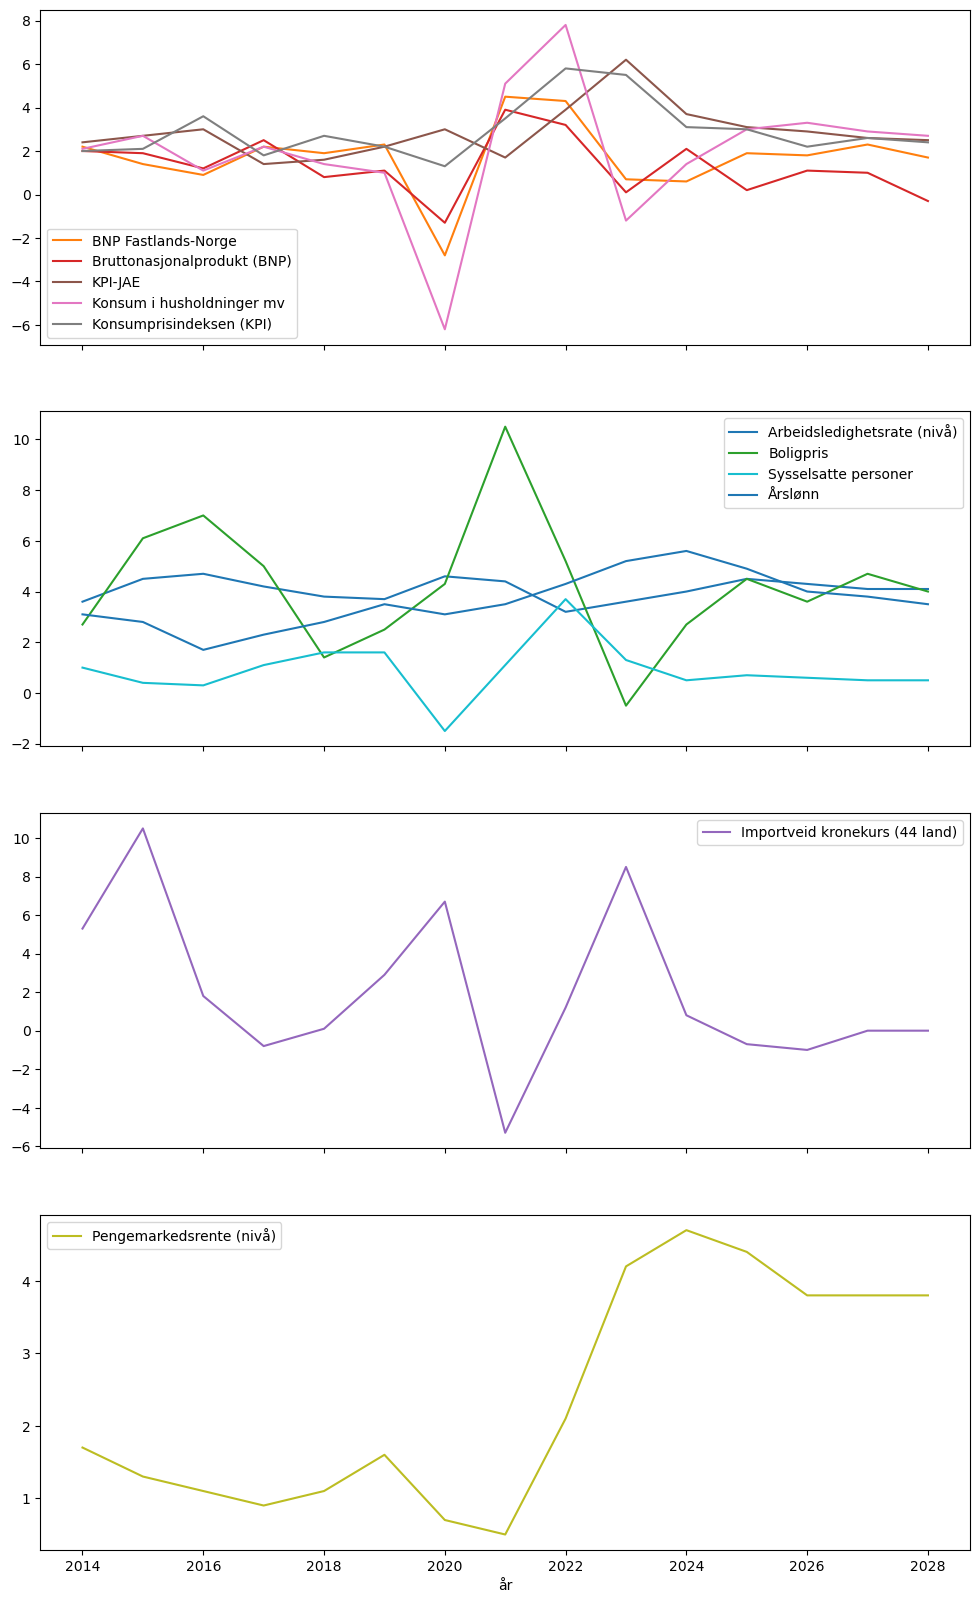

In [11]:
df2.plot(figsize=(12, 20), subplots = [('Bruttonasjonalprodukt (BNP)', 'BNP Fastlands-Norge', 'Konsum i husholdninger mv', 'Konsumprisindeksen (KPI)', 'KPI-JAE'),('Arbeidsledighetsrate (nivå)', 'Sysselsatte personer', 'Årslønn', 'Boligpris')])

<Axes: title={'center': 'Konjunkturtendensene, inkl. prognoser 4 år'}, xlabel='år'>

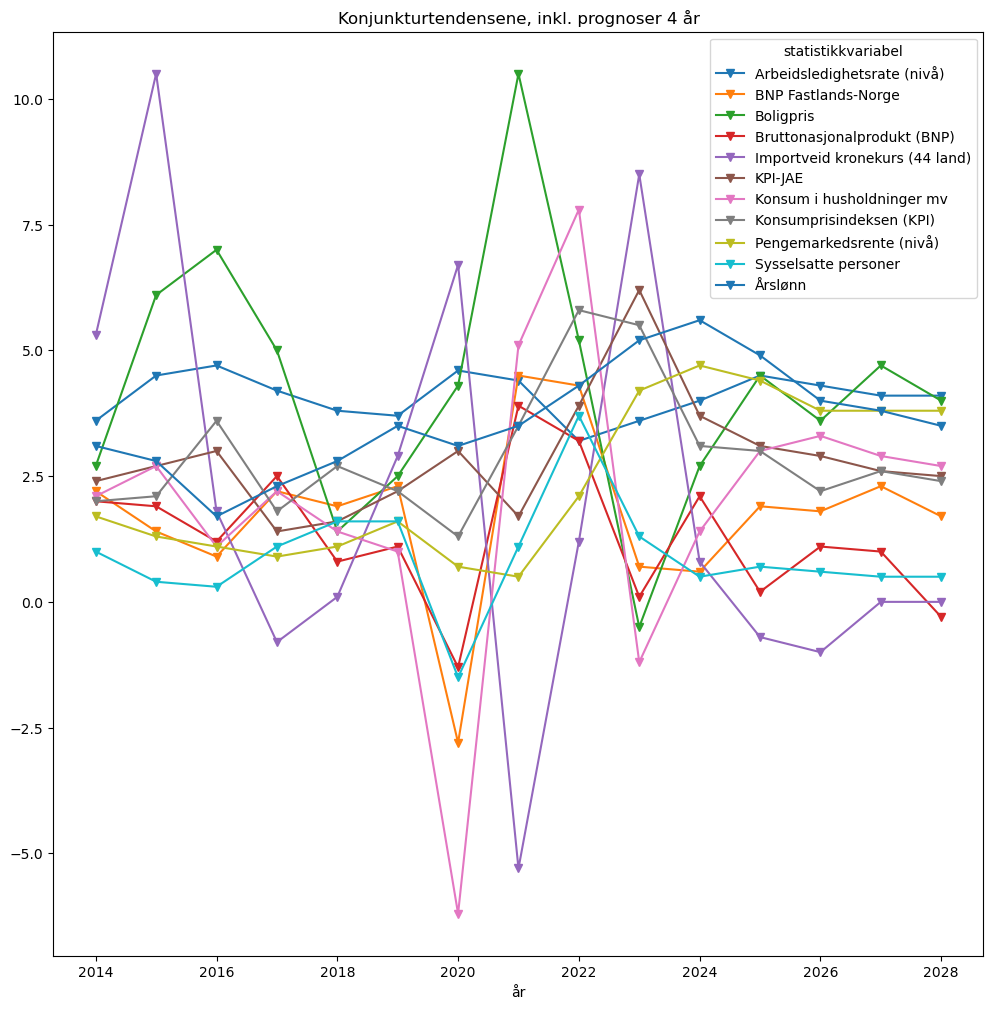

In [12]:
df2.plot(figsize=(12, 12), marker='v', title='Konjunkturtendensene, inkl. prognoser 4 år')

### Plot med et annet verktøy [Plotly](https://plotly.com/python/). Her bruker jeg det enklere "Plotly express"

In [13]:
# !pip install plotly
import plotly.express as px  # px her er standard angivelse for Plotly express. Har ikke noe å gjøre med Statistikkbank px

In [14]:
fig = px.line(df, x='år', y='12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser,')

Merk at her er input den opprinnelige df, som er 'long'. Det blir ikke bra, uten gruppering.

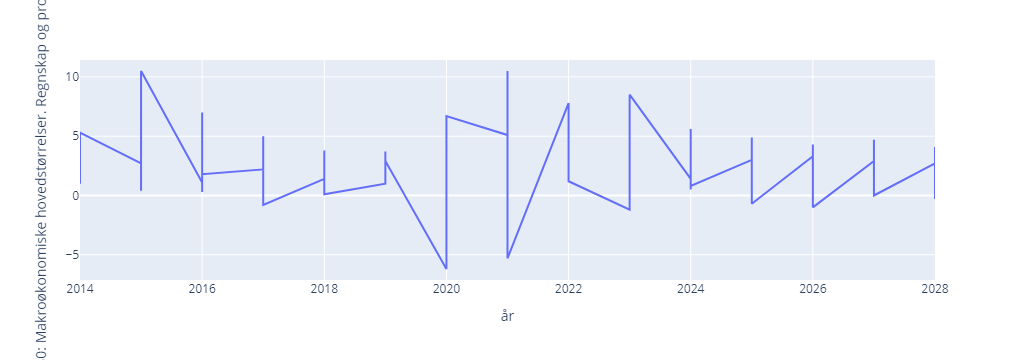

In [15]:
fig.show()

Plotly Express har argumentet 'line_group', for gruppering. Her legger jeg også på tittel og tekst til y-aksen.

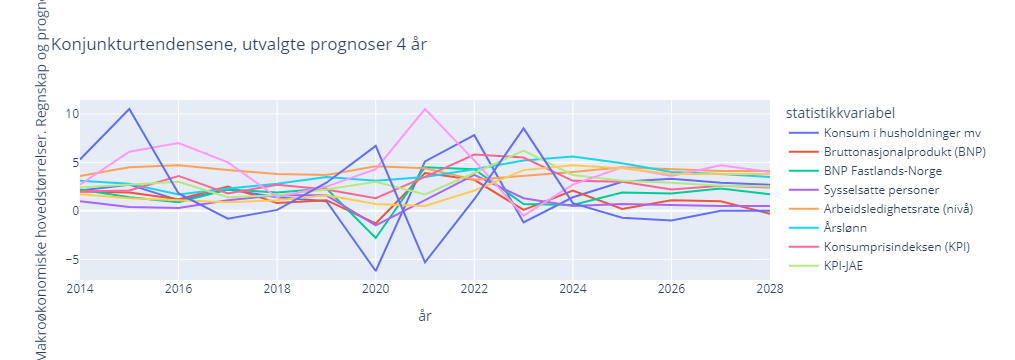

In [16]:
px.line(df, x=('år'), y='12880: Makroøkonomiske hovedstørrelser. Regnskap og prognoser,', 
              color='statistikkvariabel', 
              line_group='statistikkvariabel', 
              title='Konjunkturtendensene, utvalgte prognoser 4 år', 
              )

### Med Plotly Express wide

Plotly Express støtter fra 2020 også 'wide'. Nå vi kan lage samme plot med df2 som er 'wide'

In [17]:
df2.head(2)

statistikkvariabel,Arbeidsledighetsrate (nivå),BNP Fastlands-Norge,Boligpris,Bruttonasjonalprodukt (BNP),Importveid kronekurs (44 land),KPI-JAE,Konsum i husholdninger mv,Konsumprisindeksen (KPI),Pengemarkedsrente (nivå),Sysselsatte personer,Årslønn
år,,,,,,,,,,,
2014,3.6,2.2,2.7,2.0,5.3,2.4,2.1,2.0,1.7,1.0,3.1
2015,4.5,1.4,6.1,1.9,10.5,2.7,2.7,2.1,1.3,0.4,2.8


In [18]:
fig2 = px.line(df2, x=df2.index, y=df2.columns, line_group='statistikkvariabel')

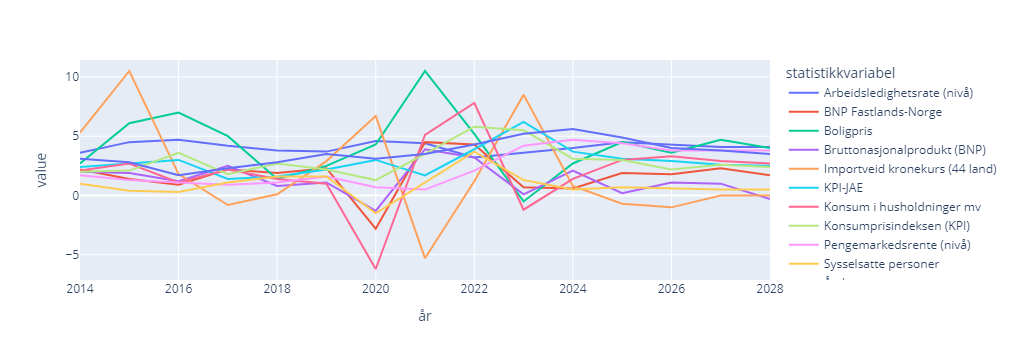

In [19]:
fig2.show()

Det er mulig å sette Plotly som Pandas .plot, istedet for Matplotlib

In [20]:
pd.options.plotting.backend = "plotly"

Da fungerer plot av df2 uten parametre 

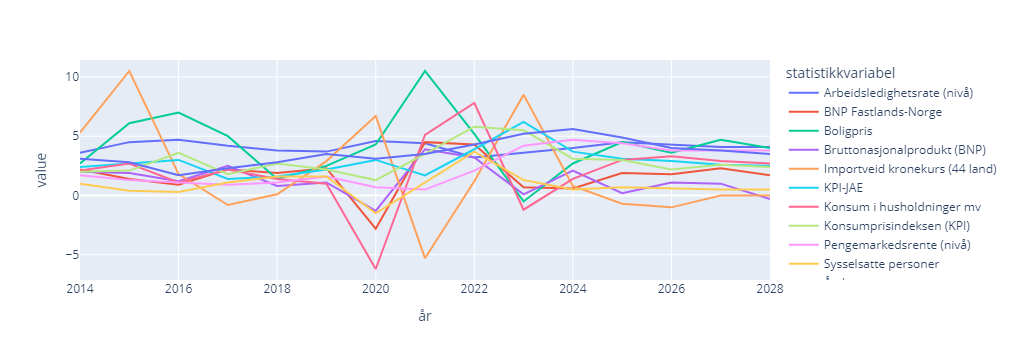

In [21]:
df2.plot()

Dessverre mister en da også fleksibiliteten, siden vi ikke kan bruke Plotly sin egen funksjonalitet. 

Her er et eksempel med Plotly facet plot.

In [22]:
fig3 = px.area(df2, 
               facet_col='statistikkvariabel', 
               facet_col_wrap=3, 
               template='none',
               height = 900,
               title = "Konjunkturtendensene - Prognoser for Norge", 
               labels = dict(value ="% endring")).update_layout(showlegend= False)

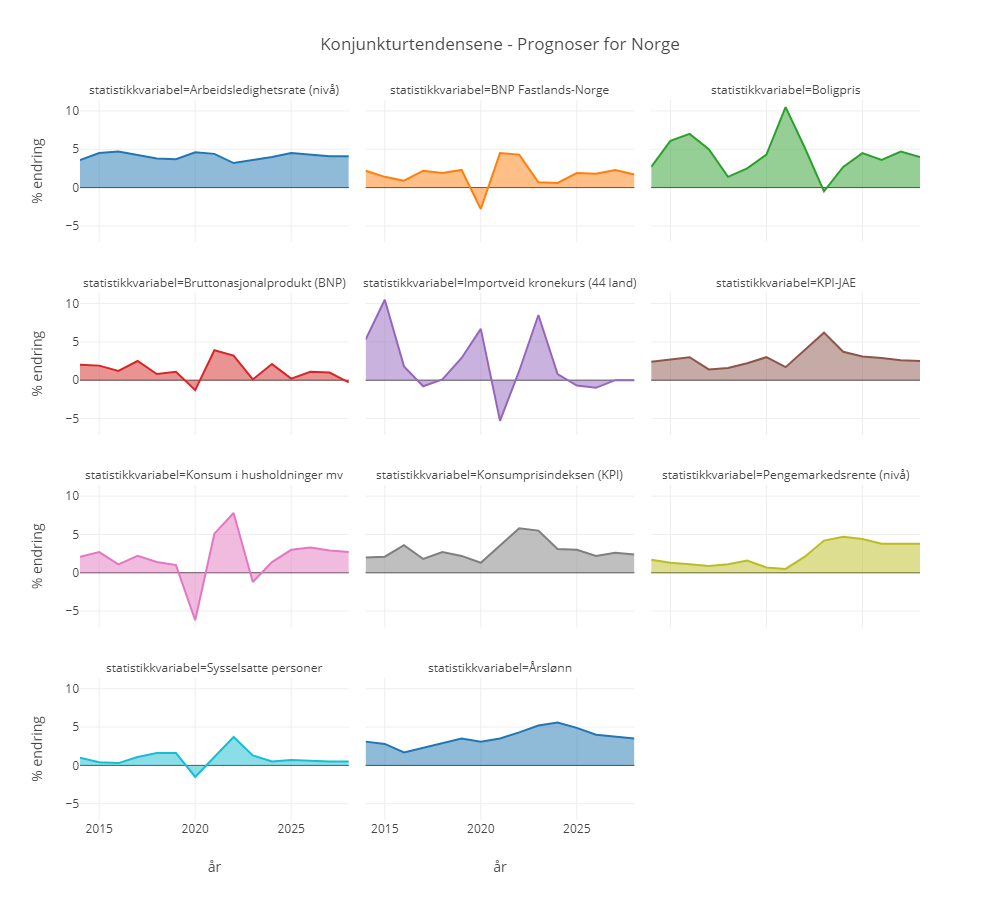

In [23]:
fig3.show()

Det blir mer oversiktlig om vi kun viser statistikkvariabelens tekst. Se [Customizing subplot title figures](https://plotly.com/python/facet-plots/#customizing-subplot-figure-titles)


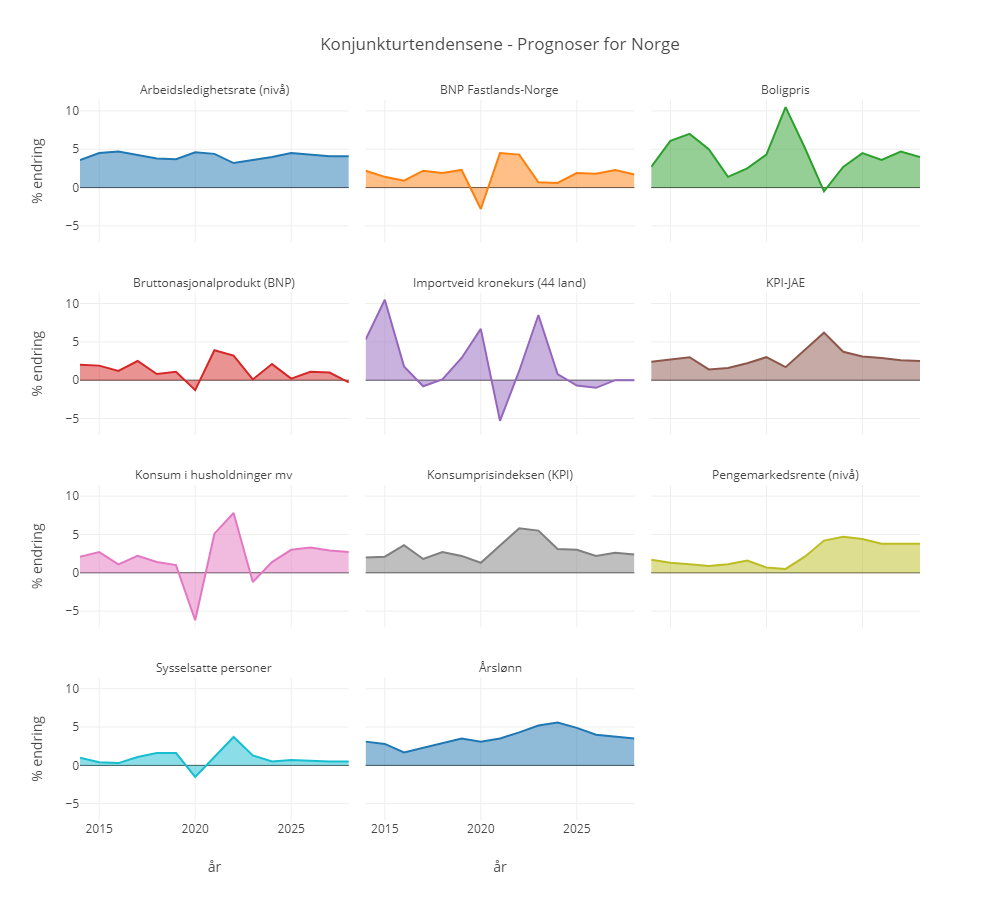

In [24]:
fig3.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))


## Hele KT-tabellen fra og med 2014

In [25]:
kt_tab_url = "https://data.ssb.no/api/pxwebapi/v2/tables/12880/data?lang=no&valueCodes[ContentsCode]=KonsumHushold,KonsumOffentl,BtoInvFastReal,BtoInvUtvRor,BtoInvFastlNorge,BtoInvNaring,BtoInvBolig,BtoInvOffForv,EtterspFastland,Eksport,EkspTradVarer,EkspOljeGass,Import,ImpTradVarer,BNP,BNPFastland,BNPIndustri,BNPLopPriser,TimeverkFastland,Sysselsatte,ArbStyrke,Yrkesandel,ArbLedighet,Aarslonn,KPI,KPIJAE,EksportprisTrad,ImportprisTrad,Boligpris,HusholdDisp,HusholdSpare,PengemRente,UtlaanRente,Realrente,ImpVKroneKurs,NOKperEuro,Driftsbalanse,DriftsbalanseBNP,EksportMarked,KonsumprisEuro,PengemRenteEuro,OljePrisDollar,OljePrisKr&valueCodes[Tid]=from(2014)&heading=Tid&outputformat=csv&outputformatparams=usetexts"

Vi henter alle variabler fra og med 2014. Det sentrale er `[Tid]=from(2014)&heading=Tid&outputformat=csv&outputformatparams=usetexts`

In [26]:
kt_tab = pd.read_csv(kt_tab_url, encoding = "ISO-8859-1")

I "Konjunkturtendenser" er de siste 4 årene prognoser.

Identifiser de siste 4 kolonnene.

In [27]:
last_4_cols = kt_tab.columns[-4:]

Sett **blå farge på prognosene**. Ved "styling" må jeg også eksplisitt sette antall desimaler som vises.

In [28]:
styled_kt_tab = kt_tab.style.format(precision=1).set_properties(
    subset=last_4_cols,
    color='blue'
    )

In [29]:
styled_kt_tab

,statistikkvariabel,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,Konsum i husholdninger mv,2.1,2.7,1.1,2.2,1.4,1.0,-6.2,5.1,7.8,-1.2,1.4,3.0,3.3,2.9,2.7
1,Konsum i offentlig forvaltning,2.7,2.4,2.3,1.9,0.6,1.1,-0.5,3.6,1.8,3.4,2.4,2.1,2.3,2.0,1.3
2,Bruttoinvestering i fast realkapital,-0.3,-4.0,3.9,2.6,2.2,9.5,-4.1,0.7,0.3,-1.5,-1.4,0.7,-1.1,2.2,1.6
3,Utvinning og rørtransport,-1.8,-12.2,-16.0,-5.4,0.7,14.3,-3.3,-0.9,-6.0,10.2,9.8,6.0,-4.0,-5.0,-6.0
4,Bruttoinvestering Fastlands-Norge,0.4,-0.2,9.0,6.8,1.5,6.3,-3.1,1.6,1.7,-2.6,-4.6,-0.8,-0.9,4.3,3.5
5,Næringer,-0.7,-2.8,12.6,9.2,3.1,10.3,-5.3,3.2,2.7,2.9,-2.9,1.4,-2.0,0.9,0.4
6,Bolig,-1.4,3.2,6.6,7.3,-6.5,-1.1,-1.6,3.5,0.4,-18.3,-19.1,-8.9,-2.7,14.0,11.4
7,Offentlig forvaltning,4.5,0.2,6.4,2.6,8.1,7.5,-1.1,-2.5,1.5,4.1,3.9,0.7,1.6,4.1,3.5
8,Etterspørsel fra Fastlands-Norge,1.9,2.0,3.1,3.1,1.2,2.3,-3.9,3.9,4.7,-0.3,0.3,1.9,2.1,2.9,2.5
9,Eksport,3.8,3.9,0.4,1.6,-1.5,2.1,-2.3,6.1,5.2,0.4,5.2,-1.3,0.9,0.0,-1.8


Et tips til slutt: Prøv å lage ditt eget datasett i stedet. Du kan også benytte det rikere JSON-stat-formatet og det tilhørende biblioteket pyjstat framfor CSV.